In [18]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import os

In [19]:

def load_api_key(filename="../data/key.txt"):
    try:
        with open(filename, 'r') as file:
            key = file.readline().strip()
            if not key:
                raise ValueError("El archivo api.txt está vacío")
            return key
    except FileNotFoundError:
        raise FileNotFoundError(f"No se encontró el archivo {filename}")
    except Exception as e:
        raise Exception(f"Error al leer la API Key: {e}")

def get_btc_volume(start_date="01-01-2025"):
    api_key = load_api_key()
    url_base = "https://api.coingecko.com/api/v3/coins/bitcoin/history"
    headers = {
        "accept": "application/json",
        "x-cg-demo-api-key": api_key
    }

    csv_path = "../data/btc_volumen_semanal.csv"
    current_date = datetime.today()
    start_dt = datetime.strptime(start_date, "%d-%m-%Y")

    dates = []
    while start_dt <= current_date:
        dates.append(start_dt.strftime("%d-%m-%Y"))
        start_dt += timedelta(weeks=1)

    volumes = []
    for date in dates:
        params = {'date': date}
        response = requests.get(url_base, headers=headers, params=params)
        response.raise_for_status()
        data = response.json()
        try:
            volume_usd = data['market_data']['total_volume']['usd']
        except (KeyError, TypeError):
            volume_usd = None
        volumes.append(volume_usd)

    df = pd.DataFrame({
        'Fecha': pd.to_datetime(dates, format="%d-%m-%Y"),
        'Volumen_USD': volumes
    })

    df.dropna(inplace=True)
    df.to_csv(csv_path, index=False)

    plt.figure(figsize=(14, 6))
    plt.plot(df['Fecha'], df['Volumen_USD'], color='red', linewidth=5)
    plt.title("Volumen semanal de Bitcoin en USD")
    plt.xlabel("Fecha")
    plt.ylabel("Volumen (USD)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()



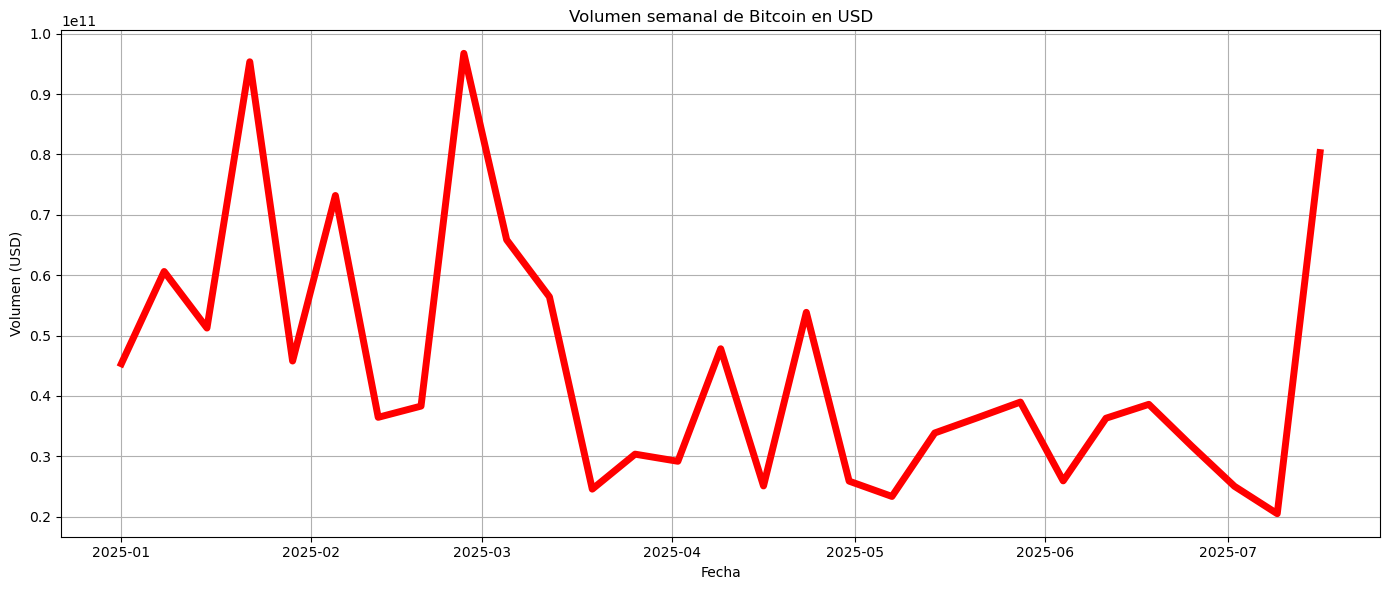

In [20]:
get_btc_volume()